In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('application_train.csv', index_col = 'SK_ID_CURR')
test_data = pd.read_csv('application_test.csv', index_col = 'SK_ID_CURR')



In [5]:
table = train_data.describe(include = "all")
table

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [6]:
for col_name in table.columns:
    if not table.isna()[col_name]['unique'] or col_name.startswith('FLAG'):
        train_data[col_name] = train_data[col_name].astype("category")
        test_data[col_name] = test_data[col_name].astype("category")
train_data['TARGET'] = train_data['TARGET'].astype("category")
train_data['HOUR_APPR_PROCESS_START'] = train_data['HOUR_APPR_PROCESS_START'].astype("int64")
test_data['HOUR_APPR_PROCESS_START'] = test_data['HOUR_APPR_PROCESS_START'].astype("int64")


In [7]:
train_data.dtypes

TARGET                        category
NAME_CONTRACT_TYPE            category
CODE_GENDER                   category
FLAG_OWN_CAR                  category
FLAG_OWN_REALTY               category
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
Length: 121, dtype: object

In [8]:
test_data.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# 1 Проверим есть ли столбцы с высокой кореляцией

<AxesSubplot:>

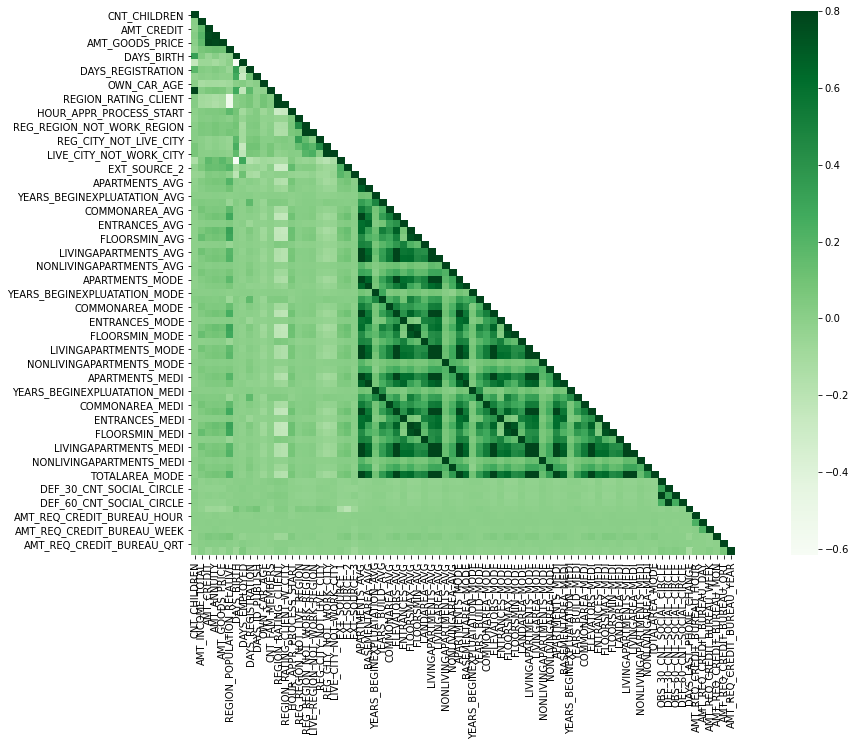

In [9]:
corrMatt = train_data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=.8, square=True)

In [10]:

corrMatt[corrMatt > 0.7].count().sum() - corrMatt[corrMatt == 1].count().sum()

252

### Получается что у нас довольно много столбцов с большой корреляцией, а поскольку это бывает вредно для некоторых алгоритмов то хорошей мыслью будет удалить фичи с больше 0.7 корреляцией

In [11]:
for col_name in corrMatt.columns:
    for row_name in corrMatt.columns:
        if row_name in corrMatt and col_name in corrMatt:
            if  corrMatt[col_name][row_name]> 0.7 and corrMatt[col_name][row_name] < 1:            
                corrMatt = corrMatt.drop(row_name, 1)
                corrMatt = corrMatt.drop(row_name, 0)
                train_data = train_data.drop(row_name,1)
                test_data = test_data.drop(row_name,1)
                print("we delete " + row_name)
            

we delete CNT_FAM_MEMBERS
we delete AMT_ANNUITY
we delete AMT_GOODS_PRICE
we delete REGION_RATING_CLIENT_W_CITY
we delete LIVE_REGION_NOT_WORK_REGION
we delete LIVE_CITY_NOT_WORK_CITY
we delete ELEVATORS_AVG
we delete LIVINGAPARTMENTS_AVG
we delete LIVINGAREA_AVG
we delete APARTMENTS_MODE
we delete ELEVATORS_MODE
we delete LIVINGAPARTMENTS_MODE
we delete LIVINGAREA_MODE
we delete APARTMENTS_MEDI
we delete ELEVATORS_MEDI
we delete LIVINGAPARTMENTS_MEDI
we delete LIVINGAREA_MEDI
we delete TOTALAREA_MODE
we delete BASEMENTAREA_MODE
we delete BASEMENTAREA_MEDI
we delete YEARS_BEGINEXPLUATATION_MODE
we delete YEARS_BEGINEXPLUATATION_MEDI
we delete YEARS_BUILD_MODE
we delete YEARS_BUILD_MEDI
we delete COMMONAREA_MODE
we delete COMMONAREA_MEDI
we delete ENTRANCES_MODE
we delete ENTRANCES_MEDI
we delete FLOORSMIN_AVG
we delete FLOORSMAX_MODE
we delete FLOORSMIN_MODE
we delete FLOORSMAX_MEDI
we delete FLOORSMIN_MEDI
we delete LANDAREA_MODE
we delete LANDAREA_MEDI
we delete NONLIVINGAPARTMENTS_M

<AxesSubplot:>

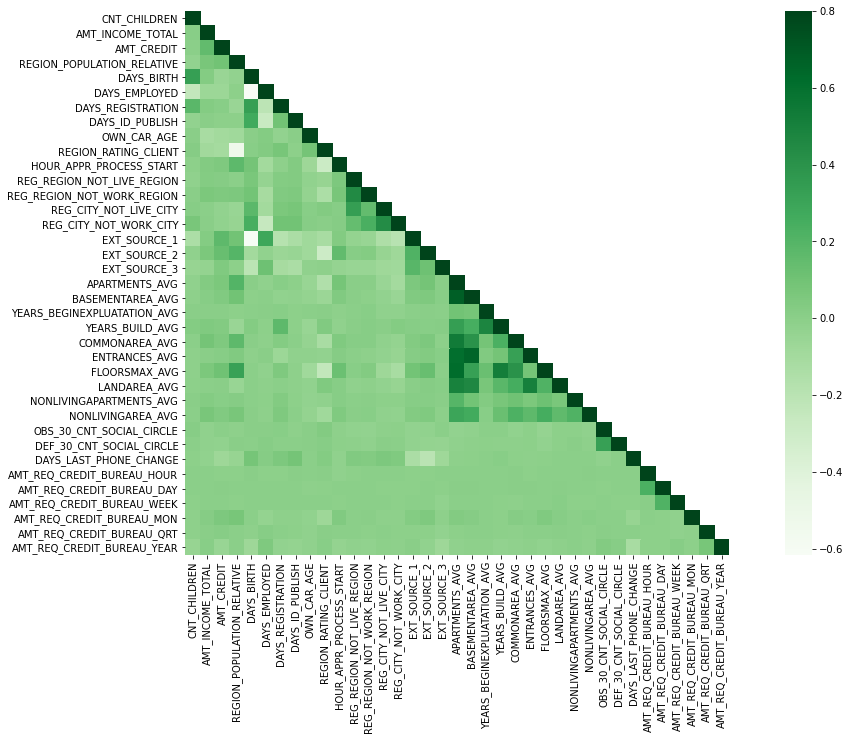

In [12]:
corrMatt1 = train_data.corr()
mask = np.array(corrMatt1)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt1, cmap="Greens", mask=mask,vmax=.8, square=True)

In [13]:
corrMatt[corrMatt > 0.7].count().sum() - corrMatt[corrMatt == 1].count().sum()

0

# 2.Посмотрим на графики распределений фич, возьмём лишь верхние 10 000 поскольку на некоторых оно может сломаться, но с таким количеством всё ещё можно считать выборки репрезентативными


## 2.1 Нумерационные колонки

In [14]:
num_features_null = train_data.select_dtypes(include=['float64', 'int64']).isnull().sum()
print(num_features_null)


CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
REGION_RATING_CLIENT                0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
EXT_SOURCE_1                   173378
EXT_SOURCE_2                      660
EXT_SOURCE_3                    60965
APARTMENTS_AVG                 156061
BASEMENTAREA_AVG               179943
YEARS_BEGINEXPLUATATION_AVG    150007
YEARS_BUILD_AVG                204488
COMMONAREA_AVG                 214865
ENTRANCES_AVG                  154828
FLOORSMAX_AVG                  153020
LANDAREA_AVG                   182590
NONLIVINGAPA

array([[<AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>],
       [<AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'REGION_RATING_CLIENT'}>,
        <AxesSubplot:title={'center':'HOUR_APPR_PROCESS_START'}>,
        <AxesSubplot:title={'center':'REG_REGION_NOT_LIVE_REGION'}>],
       [<AxesSubplot:title={'center':'REG_REGION_NOT_WORK_REGION'}>,
        <AxesSubplot:title={'center':'REG_CITY_NOT_LIVE_CITY'}>,
        <AxesSubplot:title={'center':'REG_CITY_NOT_WORK_CITY'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_1'}>,
        <AxesSubplot:title={'

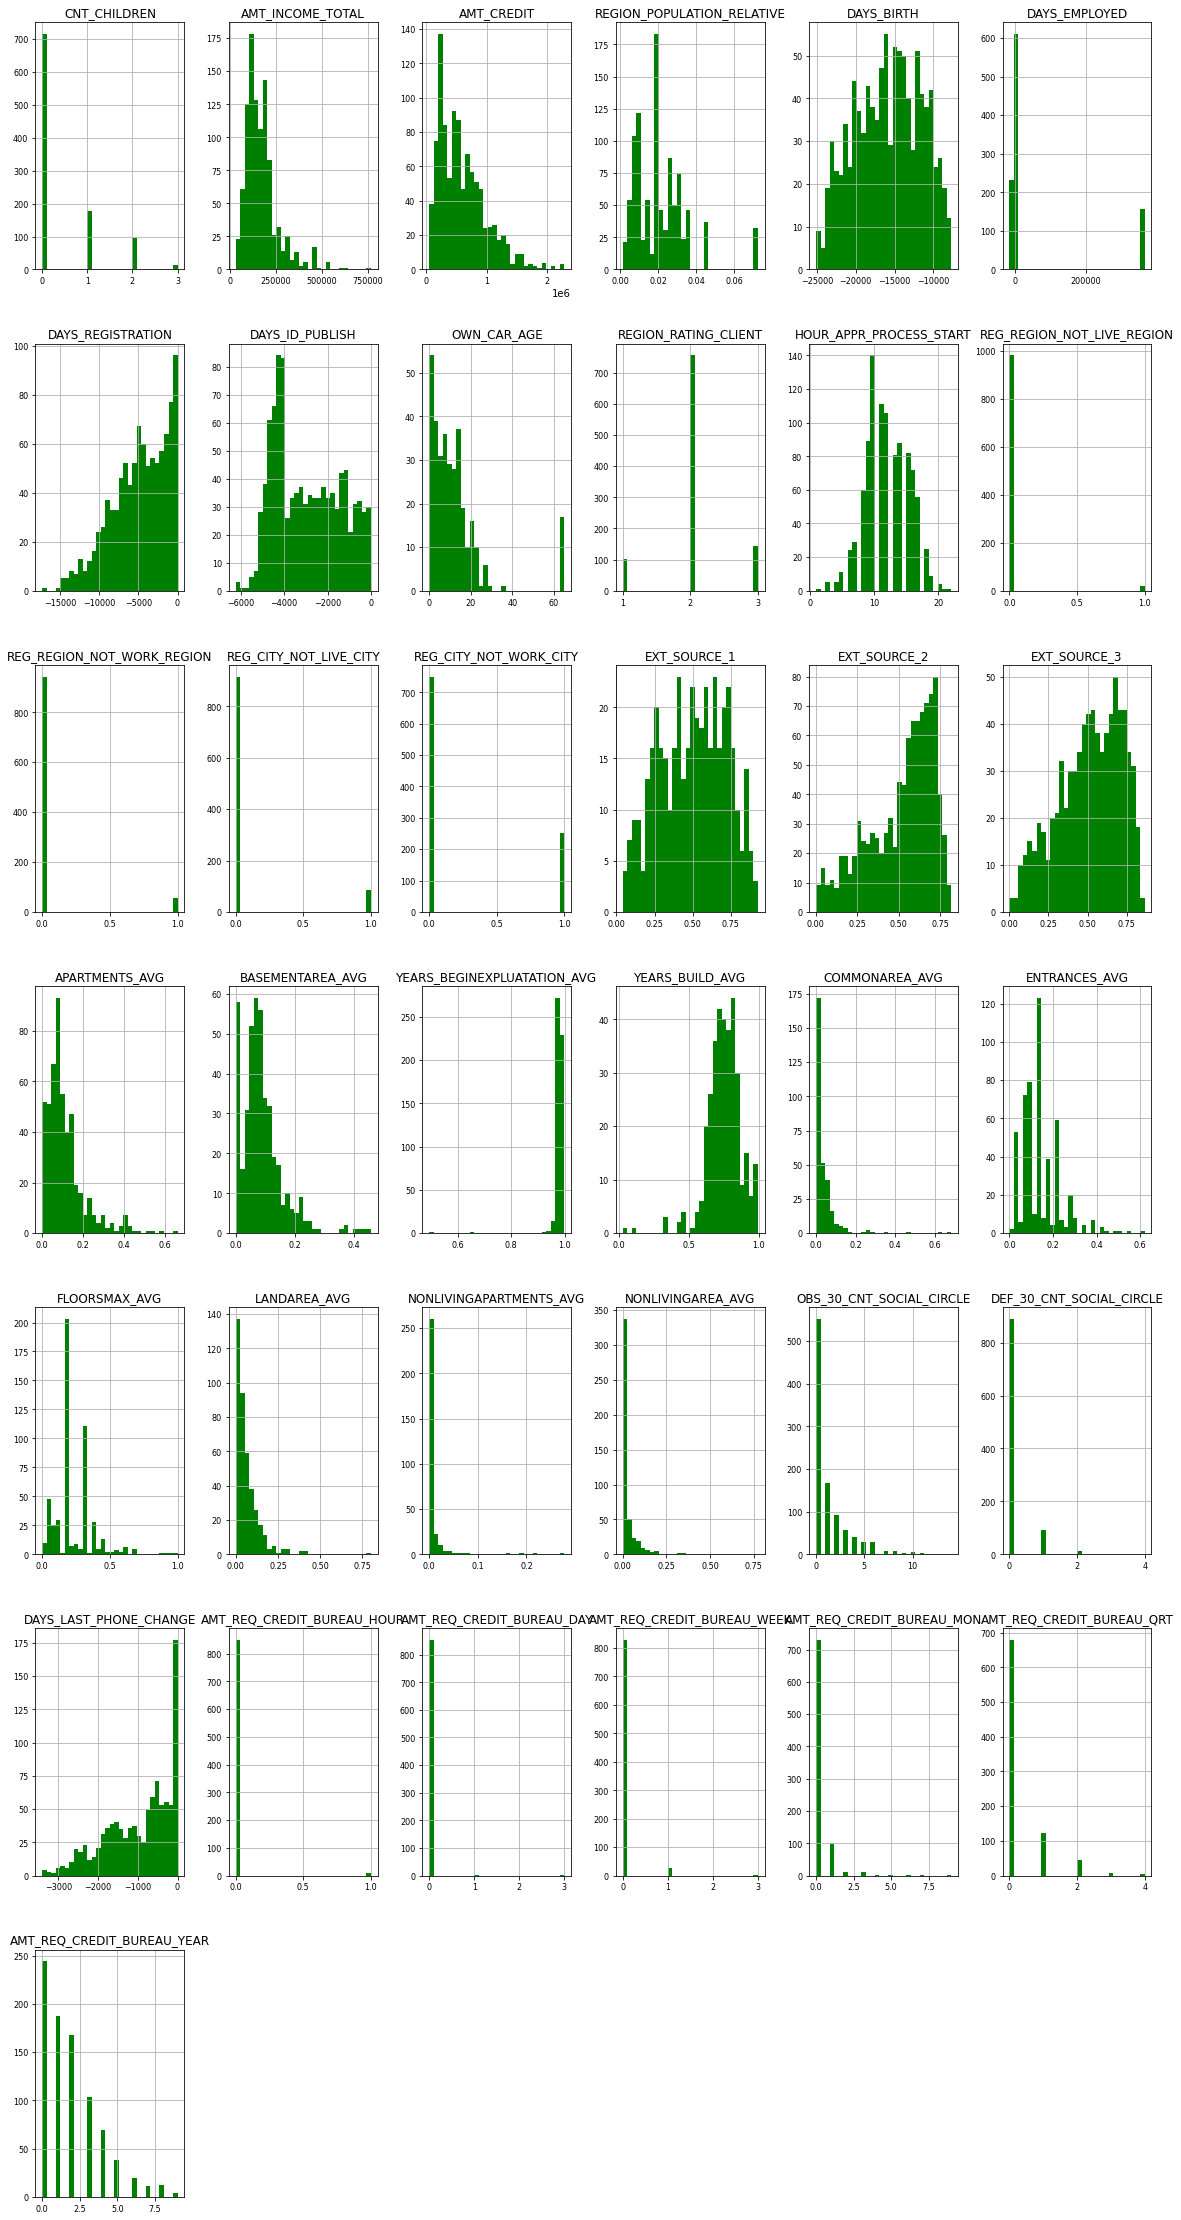

In [15]:
train_data[train_data.select_dtypes(include=['float64', 'int64']).columns].head(1000).hist(figsize=(20, 40), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

### удалим фичи где очень большая часть информации в одном столбце или же больше половины информации пустая 

In [16]:
features_to_delete = ['REG_REGION_NOT_LIVE_REGION','REG_CITY_NOT_LIVE_CITY','REG_REGION_NOT_WORK_REGION','NONLIVINGAPARTMENTS_AVG','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT']
for feature in features_to_delete:
    train_data = train_data.drop(feature,1)
    test_data = test_data.drop(feature,1)
    

In [17]:
features_to_delete = ['OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG',
'BASEMENTAREA_AVG',               
'YEARS_BEGINEXPLUATATION_AVG',    
'YEARS_BUILD_AVG',                
'COMMONAREA_AVG',                
'ENTRANCES_AVG',
'FLOORSMAX_AVG',
'LANDAREA_AVG',
'NONLIVINGAREA_AVG']
for feature in features_to_delete:
    train_data = train_data.drop(feature,1)
    test_data = test_data.drop(feature,1)
    

### заполним оставшиеся нулевые значения

In [18]:
features_to_insert_median = ['EXT_SOURCE_2','EXT_SOURCE_3']
for feature in features_to_insert_median:
    med = train_data[feature].mean()
    train_data[feature] = train_data[feature].fillna(med)
    test_data[feature] = test_data[feature].fillna(med)

In [19]:
for feature in train_data.select_dtypes(include=['float64', 'int64']).columns:
    mod = train_data[feature].mode()
    train_data[feature] = train_data[feature].fillna(mod)
    test_data[feature] = test_data[feature].fillna(mod)

In [20]:
features_to_insert_mode = ['OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'DAYS_LAST_PHONE_CHANGE',
'AMT_REQ_CREDIT_BUREAU_YEAR']
for feature in features_to_insert_mode:
    mod = train_data[feature].mode()
    print(mod)
    train_data[feature] = train_data[feature].fillna(0)
    test_data[feature] = test_data[feature].fillna(0)

0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64


array([[<AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>],
       [<AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>],
       [<AxesSubplot:title={'center':'REGION_RATING_CLIENT'}>,
        <AxesSubplot:title={'center':'HOUR_APPR_PROCESS_START'}>,
        <AxesSubplot:title={'center':'REG_CITY_NOT_WORK_CITY'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_2'}>],
       [<AxesSubplot:title={'center':'EXT_SOURCE_3'}>,
        <AxesSubplot:title={'center':'OBS_30_CNT_SOCIAL_CIRCLE'}>,
        <AxesSubplot:title={'center':'DEF_30_CNT_SOCIAL_CIRCLE'}>,
        <AxesSubplot:title={'center':'DAYS_LAST_PHONE_CHANGE'}>],
       [<AxesSubplot:title={'c

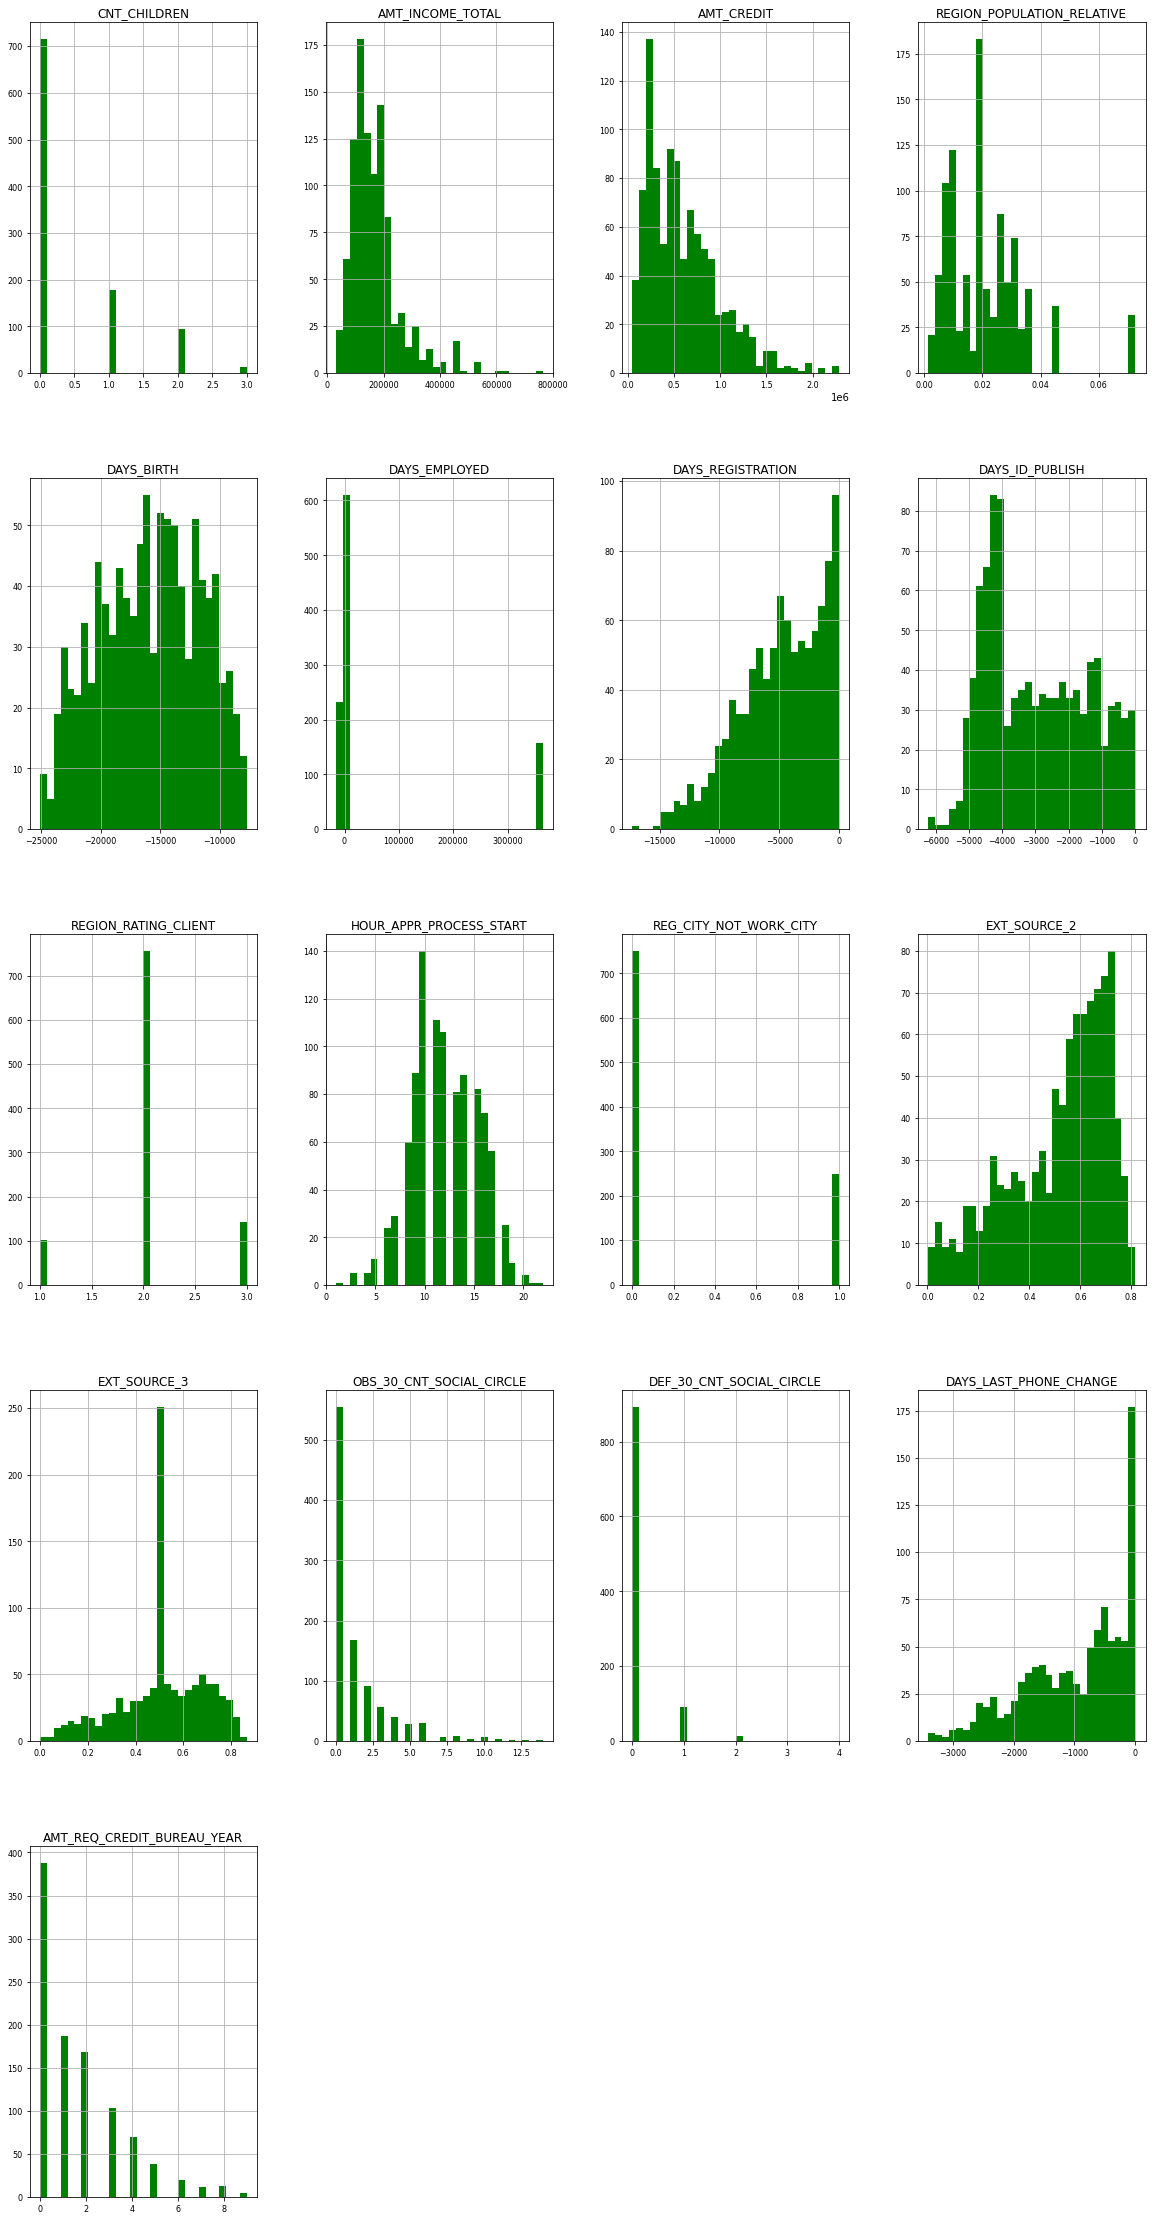

In [21]:
train_data[train_data.select_dtypes(include=['float64', 'int64']).columns].head(1000).hist(figsize=(20, 40), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

## 2.2 Категориальные колонки

In [22]:
print(train_data.select_dtypes(include=['category']).isnull().sum())

TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_5                    0
F

In [23]:
col_to_create_new_cat = ['NAME_TYPE_SUITE','OCCUPATION_TYPE']
for feature in col_to_create_new_cat:
    train_data[feature] = train_data[feature].cat.add_categories('Empty')
    test_data[feature] = test_data[feature].cat.add_categories('Empty')
    train_data[feature] = train_data[feature].fillna('Empty')
    test_data[feature] = test_data[feature].fillna('Empty')




### удалим некоторые колонки ибо отсутствует понимание за что они отвечают и как лучше исправить

In [24]:
col_to_delete = ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
for feature in col_to_delete:
    train_data = train_data.drop(feature,1)
    test_data = test_data.drop(feature,1)


### удалим значения где одна категория занимает 90+%

In [25]:
 col_to_delete = ['FLAG_DOCUMENT_7',               
'FLAG_DOCUMENT_8',                  
'FLAG_DOCUMENT_9',                   
'FLAG_DOCUMENT_10',              
'FLAG_DOCUMENT_11',             
'FLAG_DOCUMENT_12',            
'FLAG_DOCUMENT_13',              
'FLAG_DOCUMENT_14',          
'FLAG_DOCUMENT_15',             
'FLAG_DOCUMENT_16',            
'FLAG_DOCUMENT_17',          
'FLAG_DOCUMENT_18',                   
'FLAG_DOCUMENT_19',                   
'FLAG_DOCUMENT_20',                   
'FLAG_DOCUMENT_21','FLAG_DOCUMENT_2',            
'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','NAME_HOUSING_TYPE',
'FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_EMAI']
for feature in col_to_delete:
    if feature in train_data:
        train_data = train_data.drop(feature,1)
        test_data = test_data.drop(feature,1)

In [26]:
train_data.describe(include = "category")

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,2,3,2,2,8,8,5,6,2,2,2,2,19,7,58,2,2
top,0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,1,0,0,0,Empty,TUESDAY,Business Entity Type 3,1,0
freq,282686,278232,202448,202924,213312,248526,158774,218391,196432,252125,246203,221080,290069,96391,53901,67992,218340,280433


### Категориальные ординальные заменим на числовое представление

In [27]:
train_data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [28]:
diction = {'Lower secondary': 1, 'Secondary / secondary special' : 2, 'Incomplete higher': 3,'Higher education': 4,'Academic degree': 5,}
train_data['NAME_EDUCATION_TYPE'] =train_data['NAME_EDUCATION_TYPE'].apply(lambda x: diction[x])
test_data['NAME_EDUCATION_TYPE'] =test_data['NAME_EDUCATION_TYPE'].apply(lambda x: diction[x])

### там где флаги не числовые заменяем на числовые

In [29]:
diction = {'Y': 1, 'N' : 0}
cols = ['FLAG_OWN_CAR','FLAG_OWN_REALTY']
for col in cols:
    train_data[col] =train_data[col].apply(lambda x: diction[x])
    test_data[col] =test_data[col].apply(lambda x: diction[x])


### те категориальные которые уже состоят из чисел переформируем на числовые

In [30]:
for col in train_data.select_dtypes(include=['category']).columns:
    if col.startswith('FLAG') or col == 'NAME_EDUCATION_TYPE':
        train_data[col] = train_data[col].astype("int64")
        test_data[col] = test_data[col].astype("int64")

train_data['TARGET'] = train_data['TARGET'].astype("int64")    

In [31]:
test_cat = test_data.describe(include = "category")
test_cat

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
count,48744,48744,48744,48744,48744,48744,48744,48744
unique,2,2,8,7,5,19,7,58
top,Cash loans,F,Unaccompanied,Working,Married,Empty,TUESDAY,Business Entity Type 3
freq,48305,32678,39727,24533,32283,15605,9751,10840


In [32]:
train_cat = train_data.describe(include = "category")
train_cat

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
count,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,3,8,8,6,19,7,58
top,Cash loans,F,Unaccompanied,Working,Married,Empty,TUESDAY,Business Entity Type 3
freq,278232,202448,248526,158774,196432,96391,53901,67992


### У нас возникла ситуация где в зависимости от сета количество категорий меняется при чём в тест сете всегда меньше или равно чем в трейн

In [33]:
for col in test_cat.columns:
    if train_cat[col]['unique'] != test_cat[col]['unique']:
        print (col)
        print(train_data[col].unique())
        print(test_data[col].unique())
        print("--------------")
    

CODE_GENDER
['M', 'F', 'XNA']
Categories (3, object): ['M', 'F', 'XNA']
['F', 'M']
Categories (2, object): ['F', 'M']
--------------
NAME_INCOME_TYPE
['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
Categories (8, object): ['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
['Working', 'State servant', 'Pensioner', 'Commercial associate', 'Businessman', 'Student', 'Unemployed']
Categories (7, object): ['Working', 'State servant', 'Pensioner', 'Commercial associate', 'Businessman', 'Student', 'Unemployed']
--------------
NAME_FAMILY_STATUS
['Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated', 'Unknown']
Categories (6, object): ['Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated', 'Unknown']
['Married', 'Single / not married', 'Civil marriage', 'Widow', 'Separated']
Categories (5, object): ['Marrie

In [34]:
train_data = train_data.loc[train_data['CODE_GENDER'] != 'XNA']
train_data = train_data.loc[train_data['NAME_INCOME_TYPE'] != 'Maternity leave']
train_data = train_data.loc[train_data['NAME_FAMILY_STATUS'] != 'Unknown']



In [35]:
for col in test_cat.columns:
    if train_cat[col]['unique'] != test_cat[col]['unique']:
        print (col)
        print(train_data[col].unique())
        print(test_data[col].unique())
        print("--------------")
    

CODE_GENDER
['M', 'F']
Categories (2, object): ['M', 'F']
['F', 'M']
Categories (2, object): ['F', 'M']
--------------
NAME_INCOME_TYPE
['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman']
Categories (7, object): ['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman']
['Working', 'State servant', 'Pensioner', 'Commercial associate', 'Businessman', 'Student', 'Unemployed']
Categories (7, object): ['Working', 'State servant', 'Pensioner', 'Commercial associate', 'Businessman', 'Student', 'Unemployed']
--------------
NAME_FAMILY_STATUS
['Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated']
Categories (5, object): ['Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated']
['Married', 'Single / not married', 'Civil marriage', 'Widow', 'Separated']
Categories (5, object): ['Married', 'Single / not married', 'Civil marriage', 'Widow', 'Separated']
------

In [36]:
train_data['CODE_GENDER'].cat.remove_unused_categories()
train_data['NAME_INCOME_TYPE'].cat.remove_unused_categories()
train_data['NAME_FAMILY_STATUS'].cat.remove_unused_categories()




SK_ID_CURR
100002    Single / not married
100003                 Married
100004    Single / not married
100006          Civil marriage
100007    Single / not married
                  ...         
456251               Separated
456252                   Widow
456253               Separated
456254                 Married
456255                 Married
Name: NAME_FAMILY_STATUS, Length: 307500, dtype: category
Categories (5, object): ['Civil marriage', 'Married', 'Separated', 'Single / not married', 'Widow']

### а теперь разбиваем на отдельные колонки

In [37]:
train_data = pd.get_dummies(train_data, columns = (train_data.describe(include = "category")).columns , prefix =(train_data.describe(include = "category")).columns  )
test_data = pd.get_dummies(test_data, columns = (test_data.describe(include = "category")).columns , prefix =(test_data.describe(include = "category")).columns  )


In [38]:
train_data.describe(include = "all")

,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
count,307500.000000,307500.000000,307500.000000,307500.000000,3.075000e+05,3.075000e+05,307500.000000,307500.000000,307500.000000,307500.000000,...,307500.000000,307500.000000,307500.000000,307500.000000,307500.000000,307500.000000,307500.00000,307500.000000,307500.000000,307500.000000
mean,0.080725,0.340111,0.693665,0.417034,1.687971e+05,5.990259e+05,2.509493,0.020868,-16037.069246,63817.429333,...,0.000208,0.000159,0.002052,0.025467,0.000654,0.007164,0.00386,0.017554,0.004315,0.180078
std,0.272413,0.473747,0.460971,0.722108,2.371263e+05,4.024936e+05,0.874532,0.013831,4363.988872,141277.730537,...,0.014425,0.012622,0.045253,0.157538,0.025558,0.084338,0.06201,0.131325,0.065550,0.384253
min,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1.000000,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,2.000000,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,2.000000,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,3.000000,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,5.000000,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [39]:
test_data.describe(include = "all")

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
count,48744.000000,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000
mean,0.337129,0.690505,0.397054,1.784318e+05,5.167404e+05,2.541687,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.000287,0.000185,0.002503,0.026731,0.000718,0.009191,0.003570,0.018136,0.004534,0.190259
std,0.472734,0.462290,0.709047,1.015226e+05,3.653970e+05,0.886766,0.014428,4325.900393,144348.507136,3552.612035,...,0.016945,0.013587,0.049967,0.161299,0.026787,0.095428,0.059641,0.133443,0.067182,0.392510
min,0.000000,0.000000,0.000000,2.694150e+04,4.500000e+04,1.000000,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.125000e+05,2.606400e+05,2.000000,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.575000e+05,4.500000e+05,2.000000,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,2.250000e+05,6.750000e+05,4.000000,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,20.000000,4.410000e+06,2.245500e+06,5.000000,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
train_data = train_data.drop('CODE_GENDER_XNA',1)
train_data = train_data.drop('NAME_INCOME_TYPE_Maternity leave',1)
train_data = train_data.drop('NAME_FAMILY_STATUS_Unknown',1)


In [41]:
train_data.isnull().sum()

TARGET                                 0
FLAG_OWN_CAR                           0
FLAG_OWN_REALTY                        0
CNT_CHILDREN                           0
AMT_INCOME_TOTAL                       0
                                      ..
ORGANIZATION_TYPE_Transport: type 2    0
ORGANIZATION_TYPE_Transport: type 3    0
ORGANIZATION_TYPE_Transport: type 4    0
ORGANIZATION_TYPE_University           0
ORGANIZATION_TYPE_XNA                  0
Length: 135, dtype: int64

# 3 Начинаем обучение

In [50]:

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [51]:
train_x, test_x, train_y, test_y = train_test_split(train_data.drop('TARGET',1),train_data['TARGET'] , test_size=0.05)

In [52]:
sc = StandardScaler()
scaled_train_x = sc.fit_transform(train_x)

In [53]:
scaled_test_x = sc.transform(test_x)

In [54]:
lr = MLPClassifier(random_state=1, max_iter=500)
lr.fit(scaled_train_x, train_y)

MLPClassifier(max_iter=500, random_state=1)

In [55]:
train_preds = lr.predict(scaled_train_x)
print(f"Train Accuracy: {accuracy_score(train_y, train_preds)}")

Train Accuracy: 0.923625160462131


In [56]:
test_preds = lr.predict(scaled_test_x)
print(f"Test Accuracy: {accuracy_score(test_y, test_preds)}")

Test Accuracy: 0.9107642276422764


In [57]:
roc_auc_score(test_y,lr.predict_proba(test_x)[:,1])

0.4653781438889846

In [48]:
test_y

SK_ID_CURR
389412    0
363300    0
299233    0
376991    0
180047    0
         ..
346899    0
251906    0
163986    1
329425    0
427507    0
Name: TARGET, Length: 15375, dtype: int64

In [49]:
result = lr.predict(sc.fit_transform(test_data))
res = test_data.copy()
res = res.assign(TARGET = result)
for f in res.columns:
    if f!= 'TARGET':
        res = res.drop(f,1)


In [54]:
res.head()

,TARGET
SK_ID_CURR,
100001,0
100005,0
100013,0
100028,0
100038,0


In [55]:
res.to_csv('res.csv', sep=',')

### як бачимо у нас не дуже добрі значення, спробуємо збалансувати дані, видаливши половину данних з нулями

In [59]:
new_train_data = train_data.drop(train_data[train_data.TARGET == 0].index).append(train_data.drop(train_data[train_data.TARGET == 1].index).sample(50_000))

In [60]:
train_x, test_x, train_y, test_y = train_test_split(new_train_data.drop('TARGET',1),new_train_data['TARGET'] , test_size=0.05)

In [61]:
sc = StandardScaler()
scaled_train_x = sc.fit_transform(train_x)

In [62]:
scaled_test_x = sc.transform(test_x)

In [63]:
lr = MLPClassifier(random_state=1, max_iter=1_000)
lr.fit(scaled_train_x, train_y)

MLPClassifier(max_iter=1000, random_state=1)

In [65]:
result = lr.predict_proba(sc.fit_transform(test_data))[:, 1]
res = test_data.copy()
res = res.assign(TARGET = result)
for f in res.columns:
    if f!= 'TARGET':
        res = res.drop(f,1)


In [66]:
res.to_csv('res.csv', sep=',')

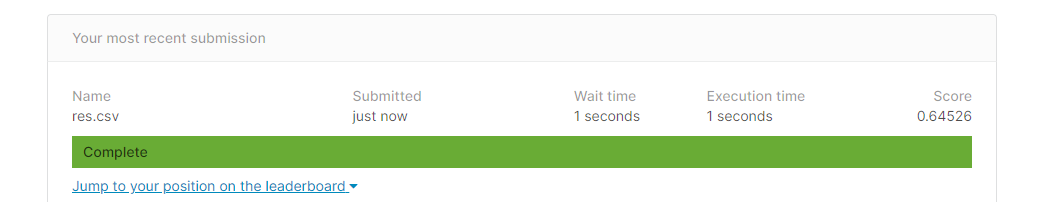

In [67]:
from IPython.display import Image
Image("СНИМОК.PNG")